# Assignment: 18-2-OLS-ordinary-least-squares

### Assignment: predicting house prices

Now, it's your turn to design your first regression model. 
- In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. 
- This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. 
- Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

Investigate the data, and do any necessary data cleaning.

Explore the data and find some variables that you think would be useful in predicting house prices.

Build your initial model using these features and estimate the parameters using OLS.
Spend up to 4 hours on this assignment. When you are done and have submitted a link to your notebook below, feel free to take a look at this example solution.


https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [4]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')


In [5]:
postgres_user = 'dsbc_student' 
postgres_pw = '7*.8G9QH21' 
postgres_host = '142.93.121.174' 
postgres_port = '5432' 
postgres_db = 'houseprices'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
housePrices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


housePrices_df.head(10)

ModuleNotFoundError: No module named 'psycopg2'

In [4]:
housePrices_df.info()

NameError: name 'housePrices_df' is not defined

### Extracting feartures from the dataset - some variables that you think would be useful in predicting house prices.


neighborhood
Utilities
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
OverallCond: Overall condition rating
YearBuilt: Original construction date
CentralAir: Central air conditioning
Bedroom: Number of bedrooms above basement level
GarageType: Garage location
EnclosedPorch: Enclosed porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
Fence: Fence quality
SaleType: Type of sale
SaleCondition: Condition of sale

In [ ]:
#housePrices_df2 = housePrices_df['neighborhood','Utilities', 'Condition1','Condition2',
                                # 'BldgType','OverallCond','YearBuilt','CentralAir','Bedroom','GarageType',
                               # 'EnclosedPorch','ScreenPorch','PoolArea','Fence','SaleType','SaleCondition']



In [12]:
housePrices_df2 = housePrices_df.iloc[:,[12,18, 19,49,50,51, 56, 61,79,80]]

In [13]:
housePrices_df2

,neighborhood,overallcond,yearbuilt,fullbath,halfbath,bedroomabvgr,fireplaces,garagecars,salecondition,saleprice
0,CollgCr,5,2003,2,1,3,0,2,Normal,208500
1,Veenker,8,1976,2,0,3,1,2,Normal,181500
2,CollgCr,5,2001,2,1,3,1,2,Normal,223500
3,Crawfor,5,1915,1,0,3,1,3,Abnorml,140000
4,NoRidge,5,2000,2,1,4,1,3,Normal,250000
...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,5,1999,2,1,3,1,2,Normal,175000
1456,NWAmes,6,1978,2,0,3,2,2,Normal,210000
1457,Crawfor,9,1941,2,0,4,2,1,Normal,266500
1458,NAmes,6,1950,1,0,2,0,1,Normal,142125


In [14]:
housePrices_df2.isnull().sum()*100/housePrices_df2.isnull().count()

neighborhood     0.0
overallcond      0.0
yearbuilt        0.0
fullbath         0.0
halfbath         0.0
bedroomabvgr     0.0
fireplaces       0.0
garagecars       0.0
salecondition    0.0
saleprice        0.0
dtype: float64

In [62]:
housePrices_df2.describe()

,overallcond,yearbuilt,fullbath,halfbath,bedroomabvgr,fireplaces,garagecars,saleprice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.575342,1971.267808,1.565068,0.382877,2.866438,0.613014,1.767123,180921.195890
std,1.112799,30.202904,0.550916,0.502885,0.815778,0.644666,0.747315,79442.502883
min,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1.000000,0.000000,2.000000,0.000000,1.000000,129975.000000
50%,5.000000,1973.000000,2.000000,0.000000,3.000000,1.000000,2.000000,163000.000000
75%,6.000000,2000.000000,2.000000,1.000000,3.000000,1.000000,2.000000,214000.000000
max,9.000000,2010.000000,3.000000,2.000000,8.000000,3.000000,4.000000,755000.000000


In [65]:
#housePrices_df2["saleprice"].value_counts()

In [52]:
### Deleting a row based on condition
#temp = housePrices_df2[ housePrices_df2['bedroomabvgr'] == 8 ].index
#housePrices_df2.drop(temp, inplace = True)

### Sale price is the target variable
- lets see how the distribution of the target variable looks like

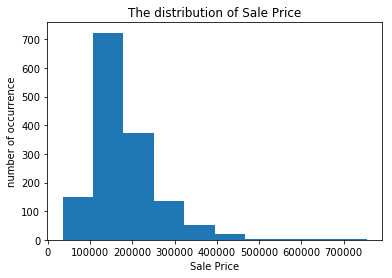

In [66]:
plt.hist(housePrices_df2.saleprice)
plt.title("The distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("number of occurrence")
plt.show()

### Look at some of the features that can effect house price
consider fullbath	halfbath	bedroomabvgr	fireplaces	garagecars  may play an important role in housing price. So, let's look at whether we see some differences between the price with and without these features


plt.bar(housePrices_df2.groupby("bedroomabvgr")["saleprice"].mean().index, housePrices_df2.groupby("bedroomabvgr")["saleprice"].mean(),
       color=("pink","blue"))
plt.title("House Sale price wrt. bedroomabvgr")
plt.ylabel("House Sale price")
plt.xlabel("# of bed room")
plt.xticks([0,8]

In [75]:
#housePrices_df2["bedroomabvgr"].value_counts()
#housePrices_df2["garagecars"].value_counts()
#housePrices_df2["fireplaces"].value_counts()
#housePrices_df2["neighborhood"].value_counts()
#housePrices_df2["halfbath"].value_counts()
#housePrices_df2["yearbuilt"].value_counts()


In [76]:
housePrices_df2["neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: neighborhood, dtype: int64

In [77]:
plt.figure(figsize=(10,6))

#plt.subplot(1,3,1)
plt.bar(housePrices_df2.groupby("neighborhood")["saleprice"].mean().index, housePrices_df2.groupby("neighborhood")["saleprice"].mean(),
       color=("pink","blue"))
plt.title("House Sale price wrt. neighborhood")
plt.ylabel("House Sale price")
plt.xlabel("neighborhood") 


plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

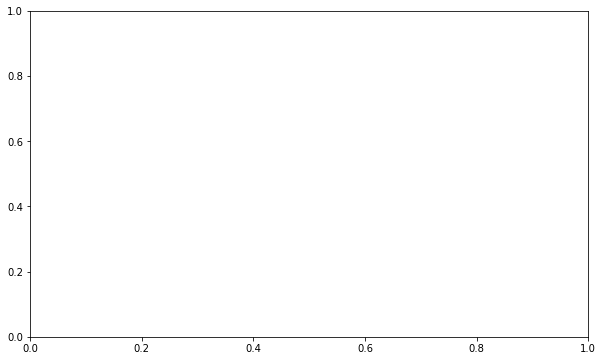

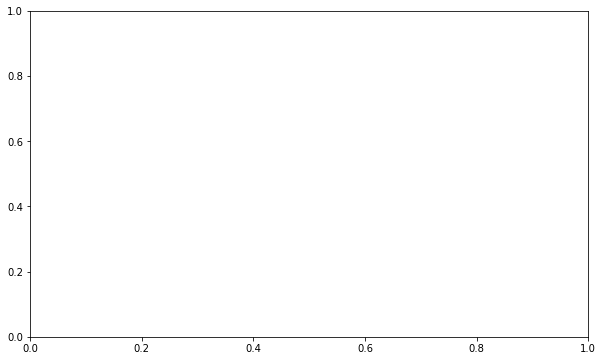

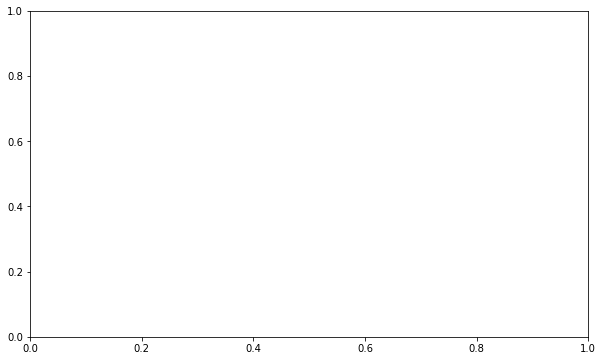

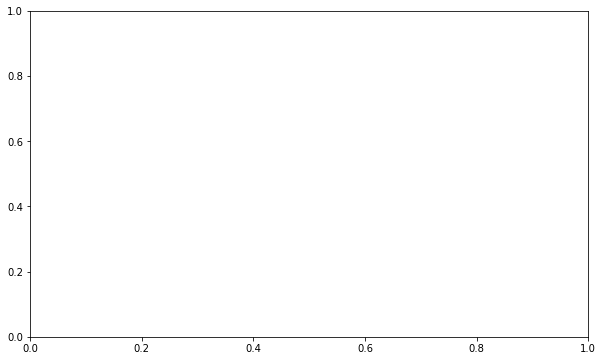

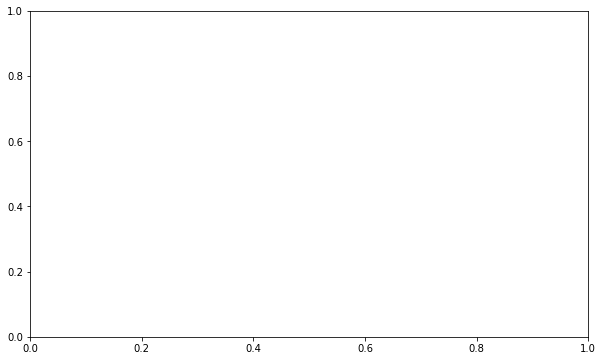

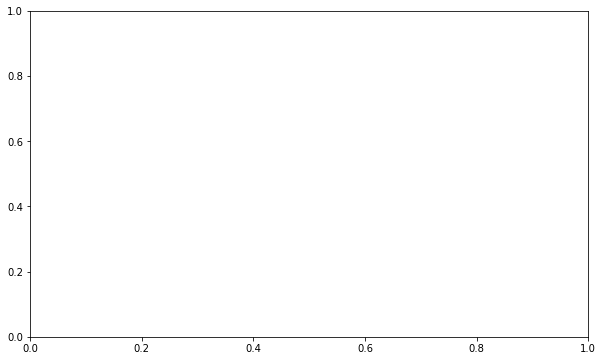

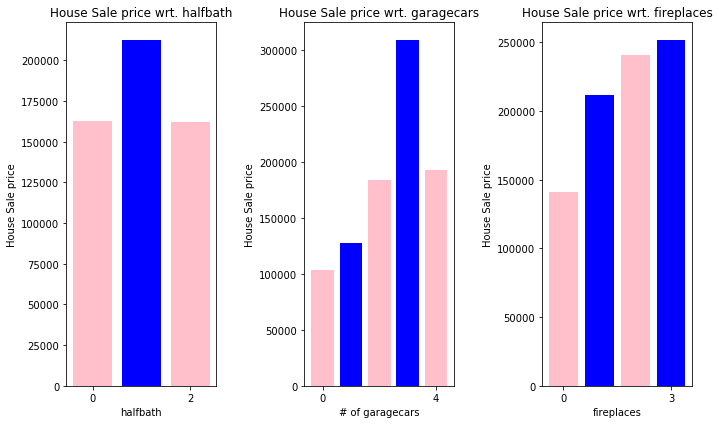

In [78]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)

plt.bar(housePrices_df2.groupby("halfbath")["saleprice"].mean().index, housePrices_df2.groupby("halfbath")["saleprice"].mean(),
       color=("pink","blue"))
plt.title("House Sale price wrt. halfbath")
plt.ylabel("House Sale price")
plt.xlabel("halfbath")
plt.xticks([0,2])


plt.subplot(1,3,2)
plt.bar(housePrices_df2.groupby("garagecars")["saleprice"].mean().index, housePrices_df2.groupby("garagecars")["saleprice"].mean(),
       color=("pink","blue"))
plt.title("House Sale price wrt. garagecars")
plt.ylabel("House Sale price")
plt.xlabel("# of garagecars")
plt.xticks([0,4])


plt.subplot(1,3,3)
plt.bar(housePrices_df2.groupby("fireplaces")["saleprice"].mean().index, housePrices_df2.groupby("fireplaces")["saleprice"].mean(),
       color=("pink","blue"))
plt.title("House Sale price wrt. fireplaces")
plt.ylabel("House Sale price")
plt.xlabel("fireplaces")
plt.xticks([0,3])

plt.tight_layout()
plt.show()
